Problem Statement: Abalone Age Prediction

Building a Regression Model

1. Download the dataset: Dataset
2. Load the dataset into the tool.
3. Perform Below Visualizations.
∙ Univariate Analysis
∙ Bi-Variate Analysis
∙ Multi-Variate Analysis
4. Perform descriptive statistics on the dataset.
5. Check for Missing values and deal with them.
6. Find the outliers and replace them outliers
7. Check for Categorical columns and perform encoding. 8. Split the data
into dependent and independent variables. 9. Scale the independent
variables
10. Split the data into training and testing
11. Build the Model
12. Train the Model
13. Test the Model

In [18]:
pwd


'c:\\Users\\Hari Prathap\\Desktop'

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#Inserting Age column

In [21]:
age = []
for x in df["Rings"]:
  age.append(x+1.5)

In [22]:
df['Age'] = age
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


#Descriptive Analysis

In [23]:
ma = df.max()
ma

Sex                    M
Length             0.815
Diameter            0.65
Height              1.13
Whole weight      2.8255
Shucked weight     1.488
Viscera weight      0.76
Shell weight       1.005
Rings                 29
Age                 30.5
dtype: object

In [24]:
mi = df.min()
mi

Sex                    F
Length             0.075
Diameter           0.055
Height               0.0
Whole weight       0.002
Shucked weight     0.001
Viscera weight    0.0005
Shell weight      0.0015
Rings                  1
Age                  2.5
dtype: object

**Measure of central tendency**

*Mean*

In [25]:
df.mean()/100

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_10776\2289579899.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()/100


Length            0.005240
Diameter          0.004079
Height            0.001395
Whole weight      0.008287
Shucked weight    0.003594
Viscera weight    0.001806
Shell weight      0.002388
Rings             0.099337
Age               0.114337
dtype: float64

*Median*

In [26]:
df.median()/100

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_10776\2167719095.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()/100


Length            0.005450
Diameter          0.004250
Height            0.001400
Whole weight      0.007995
Shucked weight    0.003360
Viscera weight    0.001710
Shell weight      0.002340
Rings             0.090000
Age               0.105000
dtype: float64

*Mode*

In [27]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0,10.5
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

**Univariate**

*Countplot*

<AxesSubplot: ylabel='count'>

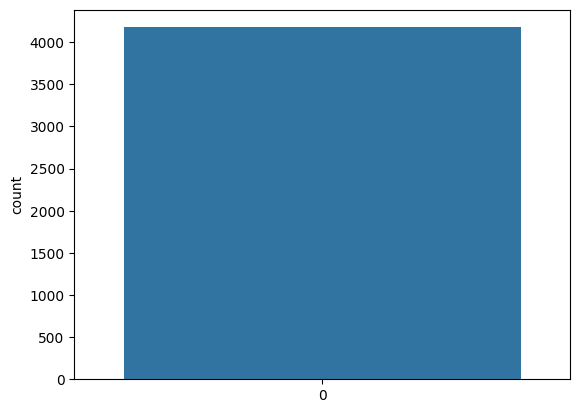

In [28]:
sns.countplot(df['Rings'])

*Histogram*

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_10776\3540148853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_10776\3540148853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x])
C:\Users\Hari Prathap\AppData\Local\Temp\i

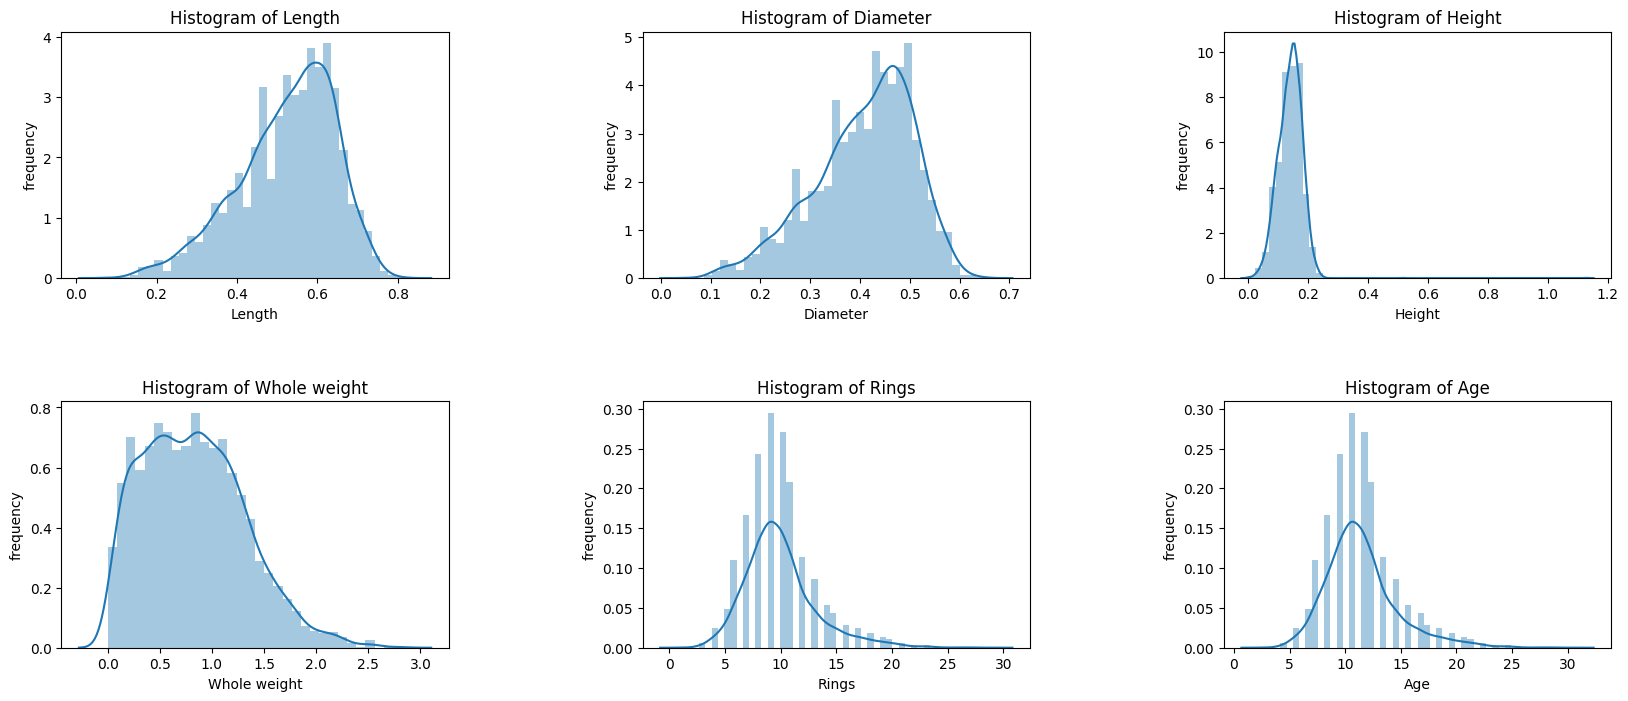

In [29]:
plt.figure(1,figsize=(20,8))
n=0
for x in ["Length","Diameter","Height","Whole weight","Rings","Age"]:
    n += 1
    plt.subplot(2 ,3, n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    plt.ylabel("frequency")
    sns.distplot(df[x])
    plt.title('Histogram of {}'.format(x))
plt.show()

*For catergerical values*

<AxesSubplot: xlabel='Rings', ylabel='Count'>

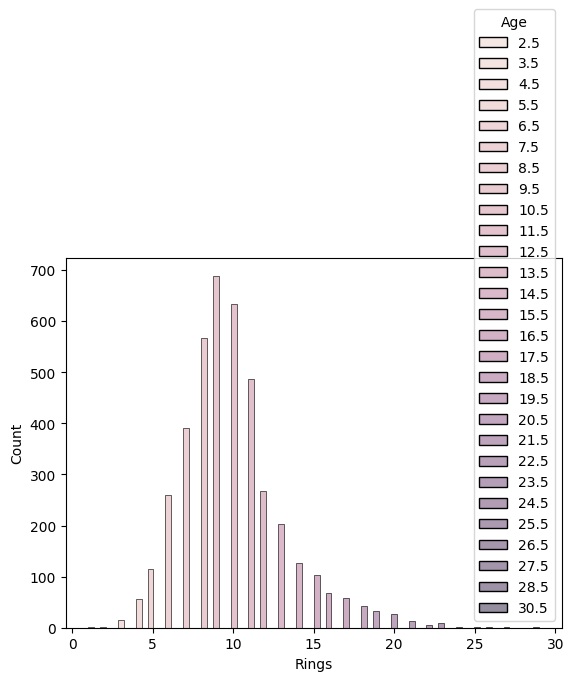

In [30]:
sns.histplot(x='Rings',data=df,hue=df['Age'],color='blue') 

*Distplot*

C:\Users\Hari Prathap\AppData\Local\Temp\ipykernel_10776\1899989495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Diameter"],color='green')


<AxesSubplot: xlabel='Diameter', ylabel='Density'>

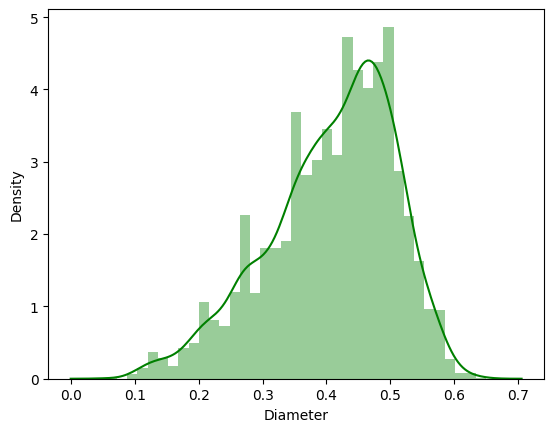

In [31]:
sns.distplot(df["Diameter"],color='green') 

*Boxplot*

<AxesSubplot: >

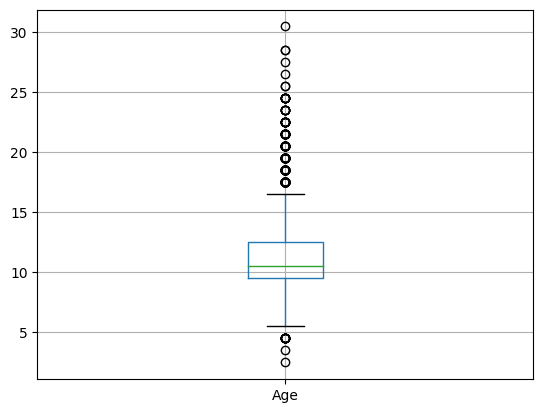

In [32]:
df.boxplot(column=['Age'])

**Multivariate Analysis**

<AxesSubplot: xlabel='Whole weight', ylabel='Age'>

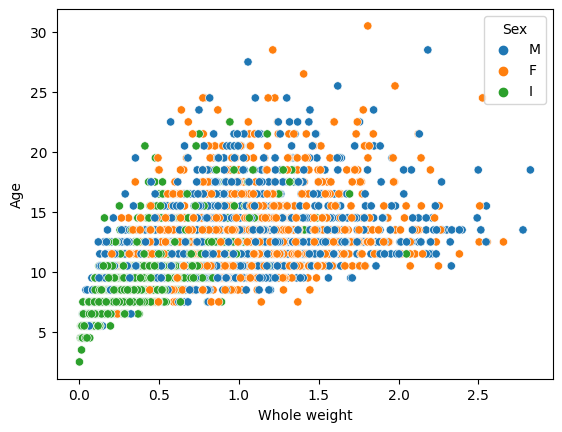

In [37]:
sns.scatterplot(x=df['Whole weight'],y=df['Age'],hue=df["Sex"])

*Pairplot*

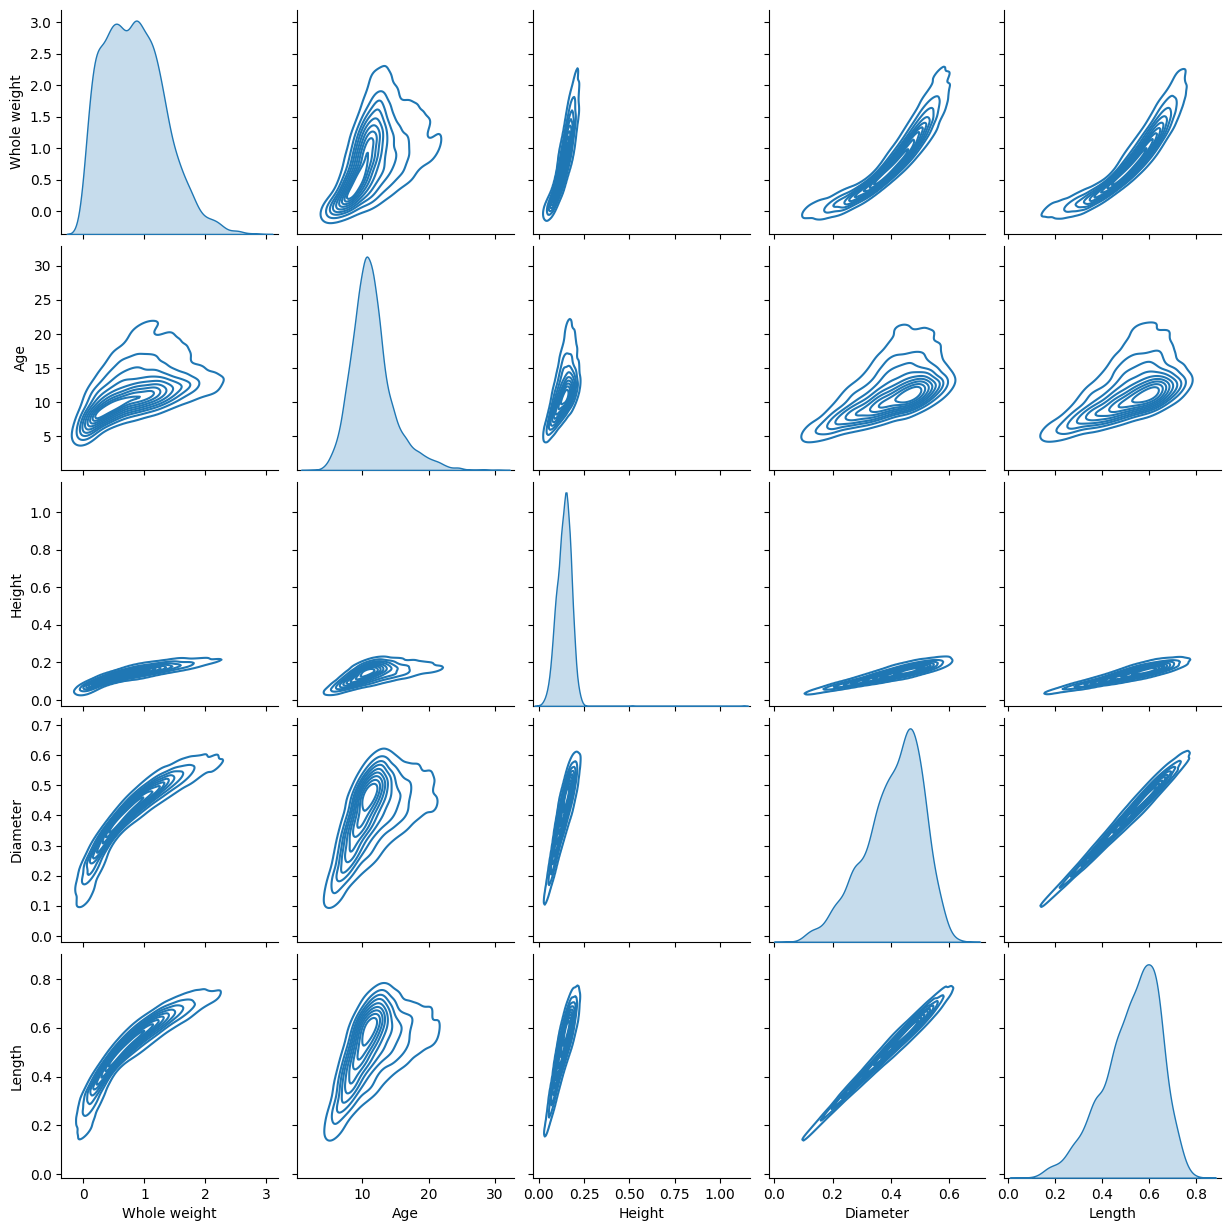

In [38]:
sns.pairplot(data=df[["Whole weight","Age","Height","Diameter","Length"]],kind="kde")

#Handling missing values

In [39]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Age               False
dtype: bool

Checking for categorical columns and perform encoding

In [40]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [41]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [42]:
Genders = df['Sex'].unique()
gender_encoding = {}
for i in range(len(Genders)):
  gender_encoding[Genders[i]] = i
len(gender_encoding)

3

*the categorical column sex has been identified*

In [43]:
df['Sex'].replace(gender_encoding,inplace=True)

In [44]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


#Identifying outliers and replacing them

*Age*

<AxesSubplot: xlabel='Age'>

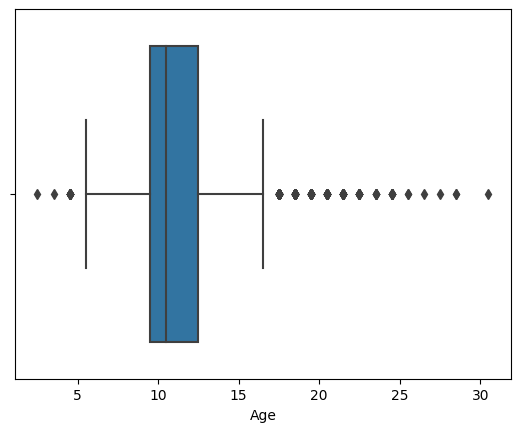

In [45]:
sns.boxplot(x=df['Age'])

In [46]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
iqr

3.0

<AxesSubplot: xlabel='Age'>

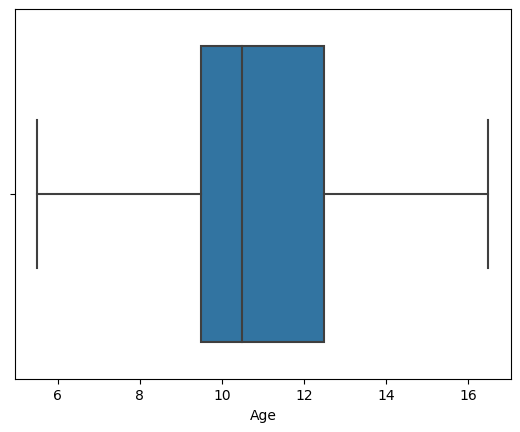

In [47]:
df.loc[df['Age'] < q1 - 1.5*iqr, 'Age'] = q1
df.loc[df['Age'] > q3 + 1.5*iqr, 'Age'] = q3
sns.boxplot(x=df['Age'])

*Rings*

<AxesSubplot: xlabel='Diameter'>

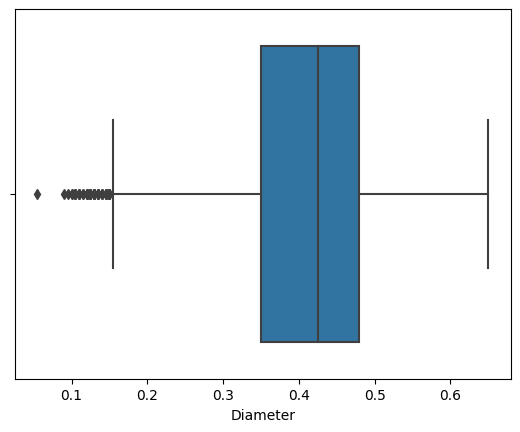

In [48]:
sns.boxplot(x=df['Diameter'])

In [49]:
q1 = df['Diameter'].quantile(0.25)
q3 = df['Diameter'].quantile(0.75)
iqr = q3 - q1
iqr

0.13

<AxesSubplot: xlabel='Diameter'>

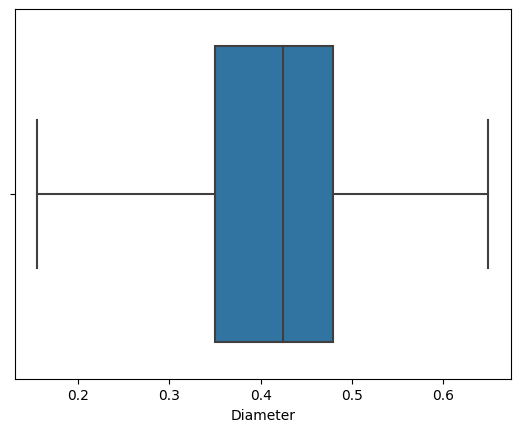

In [50]:
df.loc[df['Diameter'] < q1 - 1.5*iqr, 'Diameter'] = q1
df.loc[df['Diameter'] > q3 + 1.5*iqr, 'Diameter'] = q3
sns.boxplot(x=df['Diameter'])

*Whole weight*

<AxesSubplot: xlabel='Whole weight'>

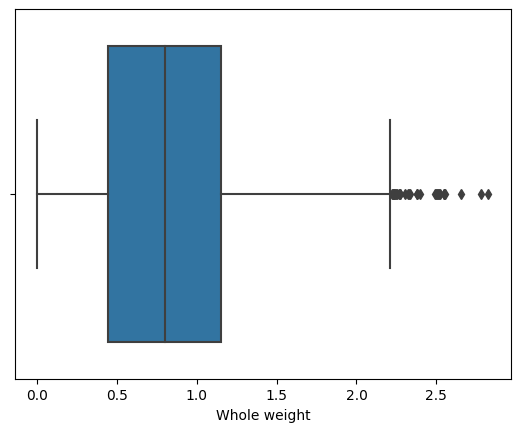

In [51]:
sns.boxplot(x=df['Whole weight'])

In [52]:
q1 = df['Whole weight'].quantile(0.25)
q3 = df['Whole weight'].quantile(0.75)
iqr = q3 - q1
iqr

0.7115

<AxesSubplot: xlabel='Whole weight'>

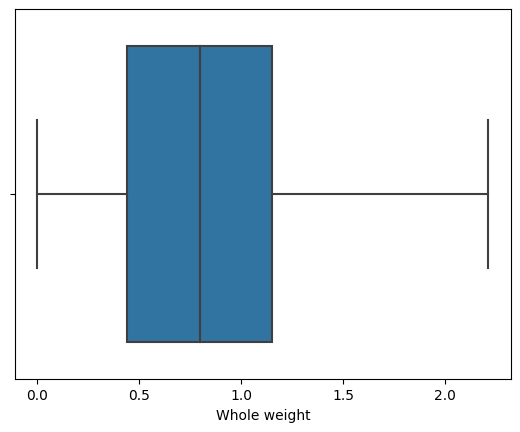

In [53]:
df.loc[df['Whole weight'] < q1 - 1.5*iqr, 'Whole weight'] = q1
df.loc[df['Whole weight'] > q3 + 1.5*iqr, 'Whole weight'] = q3
sns.boxplot(x=df['Whole weight'])

*Shell weight*

<AxesSubplot: xlabel='Shell weight'>

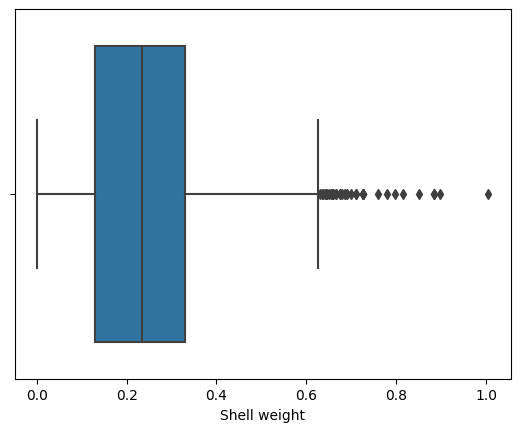

In [54]:
sns.boxplot(x=df['Shell weight'])

In [55]:
q1 = df['Shell weight'].quantile(0.25)
q3 = df['Shell weight'].quantile(0.75)
iqr = q3 - q1
iqr

0.199

<AxesSubplot: xlabel='Shell weight'>

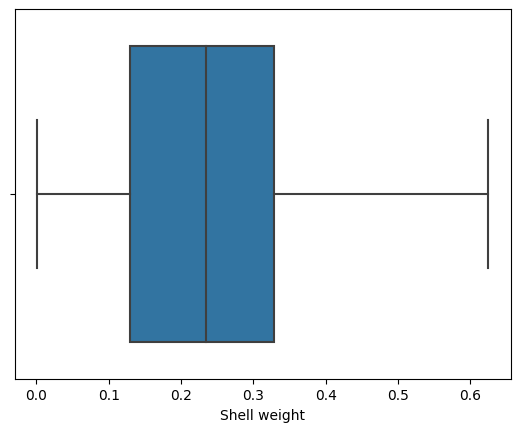

In [56]:
df.loc[df['Shell weight'] < q1 - 1.5*iqr, 'Shell weight'] = q1
df.loc[df['Shell weight'] > q3 + 1.5*iqr, 'Shell weight'] = q3
sns.boxplot(x=df['Shell weight'])

#Spliting the data into dependant and independant set

In [57]:
y = df['Age']
x = df.drop(columns=['Age'],axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [58]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [59]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [61]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

#Scaling independant variables

In [62]:
column_name = x.columns[1:]
df_copy = pd.DataFrame(df, columns =x.columns[0:])
df_copy

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scalar = MinMaxScaler()
minmax_df = scalar.fit_transform(df_copy)
minmax_df = pd.DataFrame(minmax_df, columns =x.columns[0:])
minmax_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.513514,0.424242,0.084071,0.231884,0.150303,0.132324,0.238172,0.500000
1,0.0,0.371622,0.222222,0.079646,0.101223,0.066241,0.063199,0.109864,0.214286
2,0.5,0.614865,0.535354,0.119469,0.305707,0.171822,0.185648,0.334403,0.285714
3,0.0,0.493243,0.424242,0.110619,0.232790,0.144250,0.149440,0.246191,0.321429
4,1.0,0.344595,0.202020,0.070796,0.091938,0.059516,0.051350,0.085806,0.214286
...,...,...,...,...,...,...,...,...,...
4172,0.5,0.662162,0.595960,0.146018,0.400815,0.248151,0.314022,0.396953,0.357143
4173,0.0,0.695946,0.575758,0.119469,0.436594,0.294553,0.281764,0.415397,0.321429
4174,0.0,0.709459,0.646465,0.181416,0.531703,0.352724,0.377880,0.491580,0.285714
4175,0.5,0.743243,0.666667,0.132743,0.494792,0.356422,0.342989,0.472334,0.321429


In [65]:
x = pd.DataFrame(minmax_df, columns =minmax_df.columns[0:])
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.513514,0.424242,0.084071,0.231884,0.150303,0.132324,0.238172,0.500000
1,0.0,0.371622,0.222222,0.079646,0.101223,0.066241,0.063199,0.109864,0.214286
2,0.5,0.614865,0.535354,0.119469,0.305707,0.171822,0.185648,0.334403,0.285714
3,0.0,0.493243,0.424242,0.110619,0.232790,0.144250,0.149440,0.246191,0.321429
4,1.0,0.344595,0.202020,0.070796,0.091938,0.059516,0.051350,0.085806,0.214286


#Spliting data into training and testing datasets

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=14)

# Model Training


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
y_train=y_train.astype(float) #conversion to type int from object
y_test=y_test.astype(float)

In [ ]:
rf = RandomForestRegressor(n_jobs = -1 , random_state = 14)
rf.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
def show_score(model):
  train_preds= model.predict(x_train)
  test_preds = model.predict(x_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores
show_score(rf)
# metrics.accuracy_score(pred,y_test)

In [ ]:
pred = rf.predict(x_test)

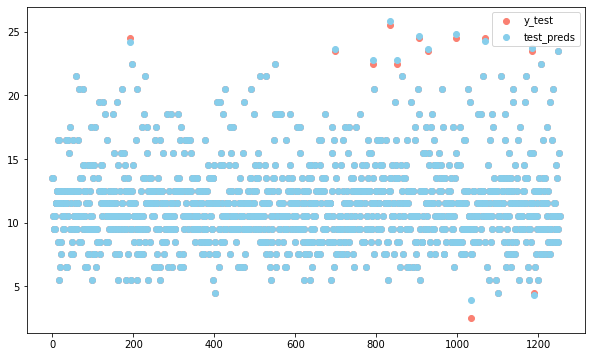

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), pred, color="skyblue", label="test_preds")
plt.legend();